
# Project: Investigate the No-Show Appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, we are going to investigate the No-show appointments dataset from Kaggle. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Through the analysis, we will focus on answering the following questions:
<ul>
    <li>What is the overall percentage of appointments where the patient did a No-Show?</li>
    <li>How does the age and the gender of the patients factor in order to predict if a patient will show up for their scheduled appointment?</li>
    <li>How does the SMS reminders factor in order to predict if a patient will show up for their scheduled appointment?</li>
</ul>

First, we will import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the data and show the first five rows
data = pd.read_csv('noshowappointments.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check for missing data and incorrect types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There doesn't seem to be any missing values in the dataset. However, there are some columns that don't have the correct types, concretely the ScheduledDay and AppointmentDay columns, which are recognized as objects (strings) instead of dates.

In [4]:
# Check for duplicated appointments
sum(data.duplicated(['AppointmentID']))

0

There doens't seem to be any duplicated appointments, either.

In [5]:
# Check the general stats for each numerical column
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There does seem to be some incoherent data, concretely the minimum age is -1, and that doesn't make sense. We will fix that in the next section.

### Data Cleaning

Let's begin fixing the datatypes for the ScheduledDay and AppointmentDay columns.

In [6]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Now the mentioned columns have the datetime type. Now, let's move on to fix the rows that have the Age as "-1".

In [7]:
# Show the rows that have an incoherent age.
data.loc[data['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


There's only one row with that issue. We now move on to replace that row's age value with the mean.

In [8]:
data = data.copy() # Make a copy of the DataFrame to suppress SettingWithCopyWarning 
data.loc[data['Age'] < 0, 'Age'] = data['Age'].mean() # Replace the value with the mean
data.loc[data['Age'] < 0] # Check if the change was made correctly

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now, we will divide the dataset into two smaller dataframes, one with the No-Show appointments and the other with the successful appointments. We will work with them in the data exploration section.

In [9]:
data_noshow = data[data['No-show'] == 'Yes']
data_show = data[data['No-show'] == 'No']

<a id='eda'></a>
## Exploratory Data Analysis

### What is the overall percentage of appointments where the patient did a No-Show?
To answer this question, let's first check the number of No-show appointments compared to the successful appointments.

In [10]:
data["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Now, let's plot that data with a pie chart.

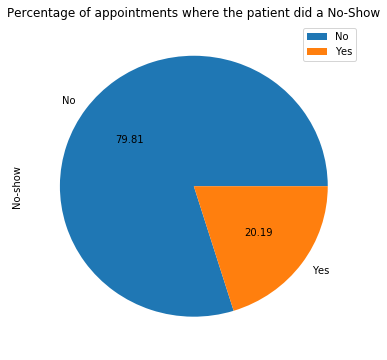

In [11]:
data["No-show"].value_counts().plot.pie(figsize=(6, 6), 
                                        autopct='%.2f',
                                        title="Percentage of appointments where the patient did a No-Show")
plt.legend();

As we can see, 20.19% of the appointments ended up with the patient not showing up.

### How does the age and the gender of the patients factor in order to predict if a patient will show up for their scheduled appointment?

Let's begin analyzing the ages of the patients that showed up and the patients that didn't.

In [12]:
data_noshow["Age"].describe() # Age stats for no-show appointments.

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [13]:
data_show["Age"].describe() # Age stats for successful appointments.

count    88208.000000
mean        37.790496
std         23.338513
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

The mean age of the patients that don't show up is 34.3, and 37.8 for the patients that do. Let's move on to create some histograms to visualize the ages better.

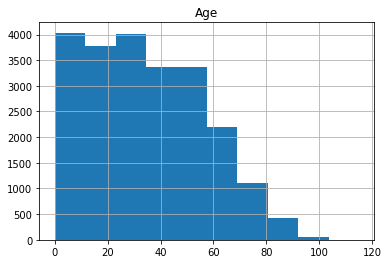

In [14]:
data_noshow.hist(column="Age"); # Histogram for no-show appointments

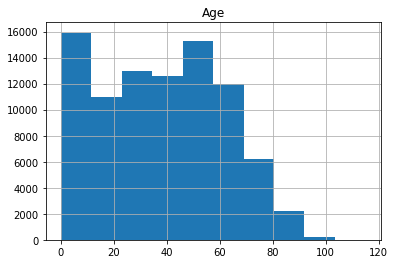

In [15]:
data_show.hist(column="Age"); # Histogram for successful appointments

Let's join those graphs together.

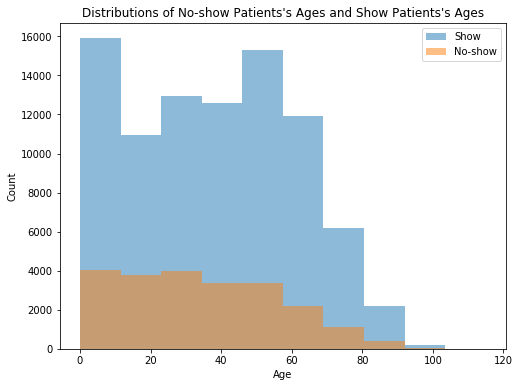

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
data_show['Age'].plot(ax=ax, kind="hist", alpha=0.5, label='Show')
data_noshow['Age'].plot(ax=ax, kind="hist", alpha=0.5, label='No-show')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.title("Distributions of No-show Patients's Ages and Show Patients's Ages")
plt.show()

To make up for the difference on the sample number between the No-show appointments and the Show appointments, and to make the visualization clearer, let's use a KDE plot to visualize the densities of ages.

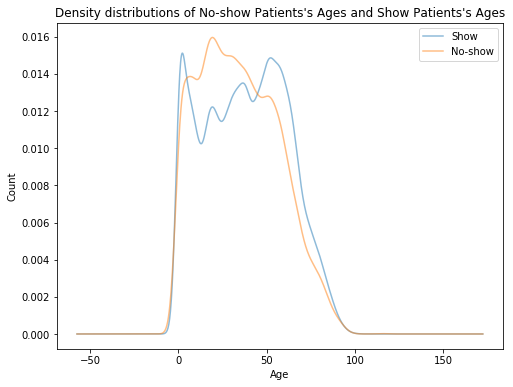

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
data_show['Age'].plot(ax=ax, kind="kde", alpha=0.5, label='Show')
data_noshow['Age'].plot(ax=ax, kind="kde", alpha=0.5, label='No-show')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.title("Density distributions of No-show Patients's Ages and Show Patients's Ages")
plt.show()

We now move on to analyze the genders of the patients.

In [18]:
data_noshow['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [19]:
data_show['Gender'].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

Let's now plot that data using pie charts.

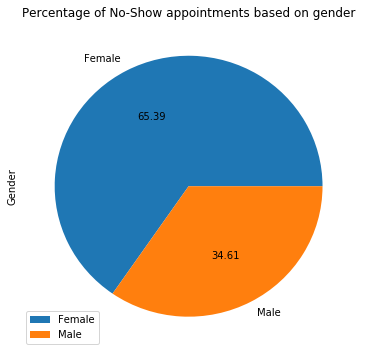

In [20]:
data_noshow['Gender'].value_counts().plot.pie(figsize=(6, 6), 
                                              autopct='%.2f', 
                                              title="Percentage of No-Show appointments based on gender",
                                              labels=['Female','Male'])
plt.legend();

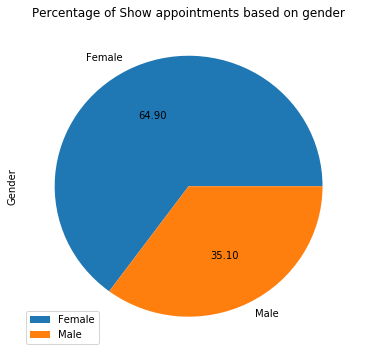

In [21]:
data_show['Gender'].value_counts().plot.pie(figsize=(6, 6), 
                                              autopct='%.2f', 
                                              title="Percentage of Show appointments based on gender",
                                              labels=['Female','Male'])
plt.legend();

Gender doesn't seem to influence the number of No-Show appointments.

### How does the SMS reminders factor in order to predict if a patient will show up for their scheduled appointment?
Let's first check the amount of patients that showed up and received SMS messages, and the amount of patients that didn't show up and also received SMS messages.

In [22]:
data_noshow["SMS_received"].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

In [23]:
data_show["SMS_received"].value_counts()

0    62510
1    25698
Name: SMS_received, dtype: int64

We now visualize those amounts in pie charts:

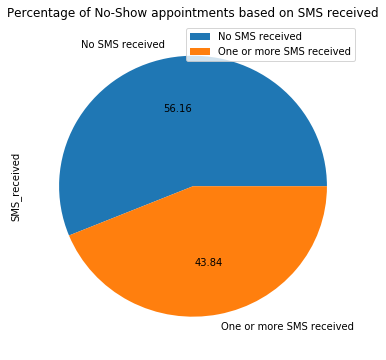

In [24]:
data_noshow['SMS_received'].value_counts().plot.pie(figsize=(6, 6), 
                                              autopct='%.2f', 
                                              title="Percentage of No-Show appointments based on SMS received",
                                              labels=['No SMS received','One or more SMS received'])
plt.legend();

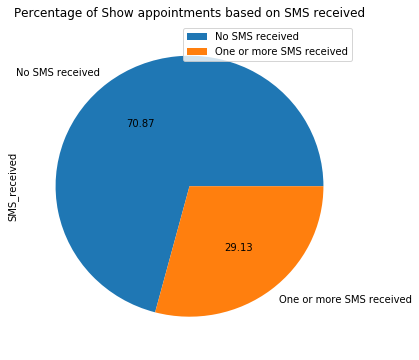

In [25]:
data_show['SMS_received'].value_counts().plot.pie(figsize=(6, 6), 
                                              autopct='%.2f', 
                                              title="Percentage of Show appointments based on SMS received",
                                              labels=['No SMS received','One or more SMS received'])
plt.legend();

<a id='conclusions'></a>
## Conclusions
Thanks to the great size of the dataset (~110.000 rows), we are confident to say that we have enough data to answer the questions proposed, and with good judgement. The dataset is well made and very informative, and the only difficulties we encountered while performing the analysis were the issues we fixed in the data cleaning section: some incorrect datatypes, and some incoherent data regarding the ages.

<ul>
    <li>Approximately 20% of all appointments end up as No-Show.</li>
    <li>The age of the patients is an important factor to predict whether if an appointment is going to end up as No-Show or not. The patients that do No-Shows are on average 3.5 years younger than those who don't. The average age of No-Show patients is 34.3, and the average age of patients that show up to appointments is 37.8.</li>
    <li>Gender does not influence the overall probability of No-Shows significantly.</li>
    <li>Sending SMS messages does not have a positive impact reducing No-Show appointments. Only 29% of the patients that showed up to their appointments received SMS messages, and almost 44% of the patients that didn't show also recieved SMS messages.</li>
</ul>


In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0